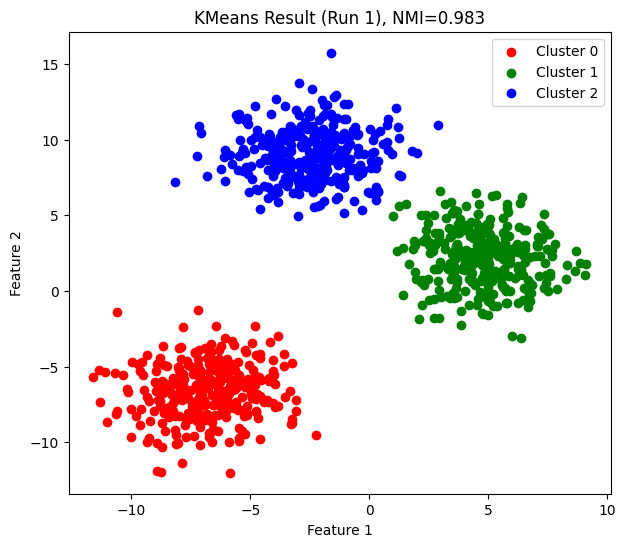

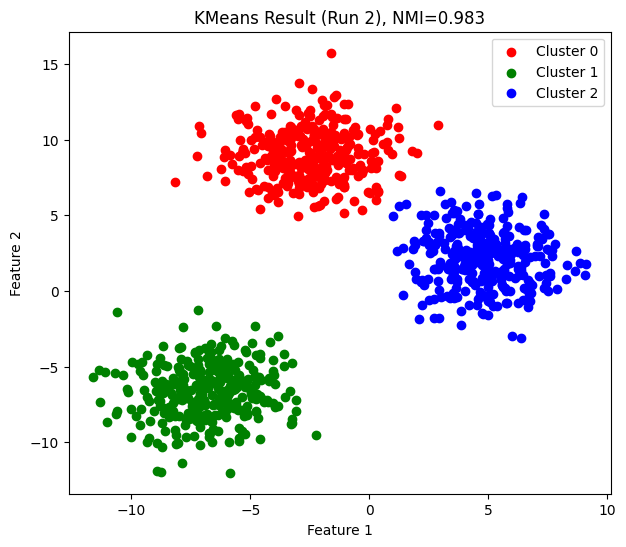

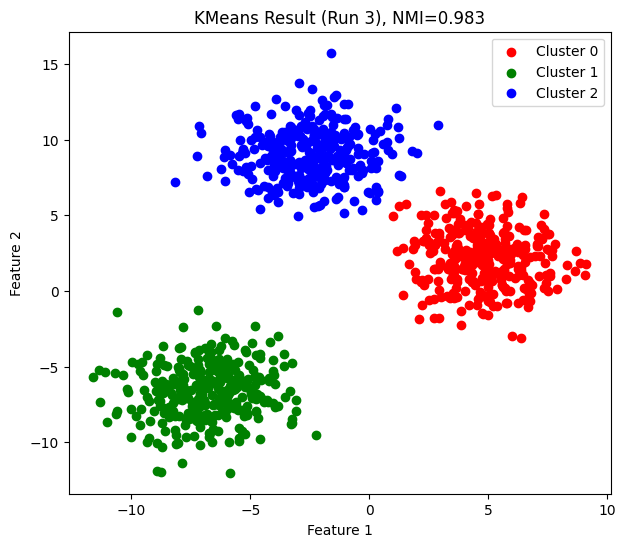

NMI Scores for each run:
Run 1: NMI Score = 0.983

Average NMI Score: 0.983


In [ ]:
from sklearn import datasets, cluster, metrics
import numpy as np
import matplotlib.pyplot as plt



# 3回クラスタリング処理を実行
for i in range(3):

    # データセット生成
    blobs, ground_truth = datasets.make_blobs(n_samples=1000, centers=3, cluster_std=1.75, random_state=42*i)

    # NMIスコアを格納するリスト
    nmi_scores = []

    # KMeansクラスタリングの実行
    kmeans = cluster.KMeans(n_clusters=3, random_state=i)  # random_stateを変えて再実行
    kmeans.fit(blobs)
    
    # NMIスコアを計算
    nmi_score = metrics.normalized_mutual_info_score(ground_truth, kmeans.labels_)
    nmi_scores.append(nmi_score)
    
    # クラスタリング結果のプロット
    plt.figure(figsize=(7, 6))
    colors = ['r', 'g', 'b']
    for j in range(3):
        p = blobs[kmeans.labels_ == j]
        plt.scatter(p[:, 0], p[:, 1], c=colors[j], label=f"Cluster {j}")
    plt.title(f"KMeans Result (Run {i+1}), NMI={nmi_score:.3f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# 各クラスタリングのNMIスコアを比較
print("NMI Scores for each run:")
for i, score in enumerate(nmi_scores):
    print(f"Run {i+1}: NMI Score = {score:.3f}")

# 平均スコアの表示
print(f"\nAverage NMI Score: {np.mean(nmi_scores):.3f}")
